In [2]:
import pandas as pd

dfp = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\cordis-HORIZONprojects-xlsx\project.xlsx")
dfo = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\cordis-HORIZONprojects-xlsx\organization.xlsx")

c:\Users\kian3\MDA\Project\project\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
dfoutput1 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\project_output_part_1.xlsx")
dfoutput2 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\project_output_part_2.xlsx")
# Originally, the output was saved in two parts. There ware some missings on the domains.
# This file, has the projects with originally missing domains
dfoutput3 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\missing_domains_final.xlsx")

In [5]:
dfoutput3_uniqueid = dfoutput3['id'].unique()
df_full_output= pd.concat([dfoutput1, dfoutput2], axis=0, ignore_index=True, verify_integrity=True)
print(df_full_output)
# Leaves out the projects with originally missing domains
df_full_output_no_missings = df_full_output[~df_full_output['id'].isin(dfoutput3_uniqueid)]
# The projects with originally missing domains are added to the dataframe with correct domains
df_full_output = pd.concat([df_full_output_no_missings, dfoutput3], axis=0, ignore_index=True, verify_integrity=True)


              id                                          objective  \
0      101116741  How do longstanding, primarily non-industrial,...   
1      101163161  The James Webb Space Telescope (JWST) has ushe...   
2      101160499  The spatiotemporal organization of the cell ma...   
3      101166905  The Milky Way is the cosmic environment in whi...   
4      101162875  Cellular organisms are complex machines whose ...   
...          ...                                                ...   
15336  101114220  The primary objective of the work performed wi...   
15337  101114193  Bibi Blomqvist co-founder and COO of Cogo ApS....   
15338  101114191  In Women TechEU, HORIZER aims, over the next 9...   
15339  101114035  A product recall is the process of retrieving ...   
15340  101121353  Engage2innovate (E2i) will investigate and add...   

                                             main_topics  \
0      ['digital technologies', 'economic diversity',...   
1      ['Astrochemistry', '

In [6]:
# Check if missings domain are gone, issue scientific domains solved
print(df_full_output["scientific_domain"].isna().sum())

0


In [7]:
print(dfo.head())

   projectID projectAcronym  organisationID       vatNumber  \
0  101116741            DOE       999981634  NL811383696B01   
1  101163161        IRASTRO       999997736      DK31119103   
2  101163161        IRASTRO       999854855     DE138408327   
3  101163161        IRASTRO       999990267     DE129517720   
4  101160499       In-phase       999874546     ESQ2818014I   

                                                name shortName    SME  \
0                              WAGENINGEN UNIVERSITY        WU  False   
1                                 AARHUS UNIVERSITET        AU  False   
2                               UNIVERSITAET POTSDAM        UP  False   
3  MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...       MPG  False   
4                  UNIVERSIDAD COMPLUTENSE DE MADRID       UCM  False   

  activityType                street postCode  ...  \
0          HES  DROEVENDAALSESTEEG 4  6708 PB  ...   
1          HES     NORDRE RINGGADE 1     8000  ...   
2          HES   AM 

In [8]:
print(dfp.shape)
print(dfo.shape)
# One to one merge dfp and df_full_output
newdf = dfp.merge(df_full_output, on="id")
### One to many merge newdf and dfo, excpect 100249 rows in fulldf
fulldf = newdf.merge(dfo, left_on="id", right_on="projectID", validate="one_to_many")
print(fulldf)

(15341, 20)
(100249, 25)
               id   acronym  status  \
0       101116741       DOE  SIGNED   
1       101163161   IRASTRO  SIGNED   
2       101163161   IRASTRO  SIGNED   
3       101163161   IRASTRO  SIGNED   
4       101160499  In-phase  SIGNED   
...           ...       ...     ...   
100244  101121353       E2i  SIGNED   
100245  101121353       E2i  SIGNED   
100246  101121353       E2i  SIGNED   
100247  101121353       E2i  SIGNED   
100248  101121353       E2i  SIGNED   

                                                    title   startDate  \
0       Digitizing Other Economies: A Comparative Appr...  2024-02-01   
1       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
2       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
3       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
4       Multiscale modelling of aberrant phase transit...  2025-06-01   
...                                                   ...         ..

In [9]:
print(df_full_output["scientific_domain"].isna().sum()) #Still oke
print(fulldf.head())
print(fulldf.info())

0
          id   acronym  status  \
0  101116741       DOE  SIGNED   
1  101163161   IRASTRO  SIGNED   
2  101163161   IRASTRO  SIGNED   
3  101163161   IRASTRO  SIGNED   
4  101160499  In-phase  SIGNED   

                                               title   startDate     endDate  \
0  Digitizing Other Economies: A Comparative Appr...  2024-02-01  2029-01-31   
1  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
2  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
3  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
4  Multiscale modelling of aberrant phase transit...  2025-06-01  2030-05-31   

  totalCost_x ecMaxContribution   legalBasis        topics  ...  \
0     1499998           1499998  HORIZON.1.1  ERC-2023-STG  ...   
1    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
2    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
3    12085363          12085363  HORIZON.1.1

In [10]:
# Delete active and nature (empty)
fulldf = fulldf.drop(columns=["active", "nature"])

In [11]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id   acronym  status  \
0  101116741       DOE  SIGNED   
1  101163161   IRASTRO  SIGNED   
2  101163161   IRASTRO  SIGNED   
3  101163161   IRASTRO  SIGNED   
4  101160499  In-phase  SIGNED   

                                               title   startDate     endDate  \
0  Digitizing Other Economies: A Comparative Appr...  2024-02-01  2029-01-31   
1  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
2  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
3  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
4  Multiscale modelling of aberrant phase transit...  2025-06-01  2030-05-31   

  totalCost_x ecMaxContribution   legalBasis        topics  ...  \
0     1499998           1499998  HORIZON.1.1  ERC-2023-STG  ...   
1    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
2    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
3    12085363          12085363  HORIZON.1.1  

In [12]:
# To save memory and speed ML training save categorical variables as category datatype
print(fulldf["status"].dtype)
print(fulldf["status"].nbytes)
fulldf["status"] = fulldf["status"].astype("category")
print(fulldf["status"].nbytes)
fulldf["status"].dtype

object
801992
100273


CategoricalDtype(categories=['CLOSED', 'SIGNED', 'TERMINATED'], ordered=False, categories_dtype=object)

In [13]:
# Can be used to include features about the amount of coordinators, participants, ... of a project
print(fulldf["role"].dtype)
print(fulldf["role"].nbytes)
fulldf["role"] = fulldf["role"].astype("category")
print(fulldf["role"].nbytes)
fulldf["role"].dtype

object
801992
100281


CategoricalDtype(categories=['associatedPartner', 'coordinator', 'participant',
                  'thirdParty'],
, ordered=False, categories_dtype=object)

In [14]:
# 15 different levels, maybe add as a feature?
print(fulldf["legalBasis"].dtype)
print(fulldf["legalBasis"].nbytes)
fulldf["legalBasis"] = fulldf["legalBasis"].astype("category")
print(fulldf["legalBasis"].nbytes)
fulldf["legalBasis"].dtype

object
801992
100369


CategoricalDtype(categories=['EURATOM2027', 'HORIZON.1.1', 'HORIZON.1.2', 'HORIZON.1.3',
                  'HORIZON.2.1', 'HORIZON.2.2', 'HORIZON.2.3', 'HORIZON.2.4',
                  'HORIZON.2.5', 'HORIZON.2.6', 'HORIZON.3.1', 'HORIZON.3.2',
                  'HORIZON.3.3', 'HORIZON.4.1', 'HORIZON.4.2'],
, ordered=False, categories_dtype=object)

In [15]:
# too many, only use our topic feature
print(fulldf["topics"].dtype)
print(fulldf["topics"].nbytes)
fulldf["topics"] = fulldf["topics"].astype("category")
print(fulldf["topics"].nbytes)
fulldf["topics"].dtype

object
801992
216842


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SyG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2024-ERA-01-01',
                  'HORIZON-WIDERA-2024-ERA-01-03',
                  'HORIZON-WIDERA-2024-ERA-01-04',
                  'HORIZON-WIDERA-2024-ERA-01-07',
                  'HORIZON-WIDERA-2024-ERA-01-08',
                  'HORIZON-WIDERA-2024-ERA-01-09',
                  'HORIZON-WIDERA-2024-ERA-01-11',
                  'HORIZON-WIDERA-2024-ERA-01-12',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [16]:
# one category, will be dropped as it is not informative
print(fulldf["frameworkProgramme"].dtype)
print(fulldf["frameworkProgramme"].nbytes)
fulldf["frameworkProgramme"] = fulldf["frameworkProgramme"].astype("category")
print(fulldf["frameworkProgramme"].nbytes)
fulldf["frameworkProgramme"].dtype
fulldf = fulldf.drop(columns=["frameworkProgramme"])

object
801992
100257


In [17]:
# Also too many levels, looks like topics (test dubble columns later)
print(fulldf["masterCall"].dtype)
print(fulldf["masterCall"].nbytes)
fulldf["masterCall"] = fulldf["masterCall"].astype("category")
print(fulldf["masterCall"].nbytes)
fulldf["masterCall"].dtype


object
801992
204402


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SYG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2023-ESOF-IBA',
                  'HORIZON-WIDERA-2023-EU-CECR-IBA',
                  'HORIZON-WIDERA-2023-EUCYS-IBA',
                  'HORIZON-WIDERA-2023-RESAVER-IBA',
                  'HORIZON-WIDERA-2023-TALENTS-01',
                  'HORIZON-WIDERA-2023-TALENTS-02',
                  'HORIZON-WIDERA-2024-COST-SGA', 'HORIZON-WIDERA-2024-ERA-01',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [18]:
# Also too many levels, looks like topics and mastercall (test dubble columns later)
print(fulldf["subCall"].dtype)
print(fulldf["subCall"].nbytes)
fulldf["subCall"] = fulldf["subCall"].astype("category")
print(fulldf["subCall"].nbytes)
fulldf["subCall"].dtype

object
801992
204402


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SYG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2023-ESOF-IBA',
                  'HORIZON-WIDERA-2023-EU-CECR-IBA',
                  'HORIZON-WIDERA-2023-EUCYS-IBA',
                  'HORIZON-WIDERA-2023-RESAVER-IBA',
                  'HORIZON-WIDERA-2023-TALENTS-01',
                  'HORIZON-WIDERA-2023-TALENTS-02',
                  'HORIZON-WIDERA-2024-COST-SGA', 'HORIZON-WIDERA-2024-ERA-01',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [19]:
# +30 cat's but looks like there is a lot of subschemes (ERC, EURATOM, HORIZON, EI...)
print(fulldf["fundingScheme"].dtype)
print(fulldf["fundingScheme"].nbytes)
fulldf["fundingScheme"] = fulldf["fundingScheme"].astype("category")
print(fulldf["fundingScheme"].nbytes)
fulldf["fundingScheme"].dtype

object
801992
100561


CategoricalDtype(categories=['CSA', 'EIC', 'EIC-ACC', 'ERC', 'ERC-POC', 'ERC-SYG',
                  'EURATOM-COFUND', 'EURATOM-CSA', 'EURATOM-IA', 'EURATOM-RIA',
                  'HORIZON-AG', 'HORIZON-AG-LS', 'HORIZON-AG-UN',
                  'HORIZON-COFUND', 'HORIZON-CSA', 'HORIZON-EIC',
                  'HORIZON-EIC-ACC', 'HORIZON-EIC-ACC-BF', 'HORIZON-EIT-KIC',
                  'HORIZON-ERC', 'HORIZON-ERC-POC', 'HORIZON-ERC-SYG',
                  'HORIZON-IA', 'HORIZON-JU-CSA', 'HORIZON-JU-IA',
                  'HORIZON-JU-RIA', 'HORIZON-PCP', 'HORIZON-RIA',
                  'HORIZON-TMA-MSCA-Cofund-D', 'HORIZON-TMA-MSCA-Cofund-P',
                  'HORIZON-TMA-MSCA-DN', 'HORIZON-TMA-MSCA-DN-ID',
                  'HORIZON-TMA-MSCA-DN-JD', 'HORIZON-TMA-MSCA-PF-EF',
                  'HORIZON-TMA-MSCA-PF-GF', 'HORIZON-TMA-MSCA-SE', 'IA',
                  'MSCA-PF', 'RIA'],
, ordered=False, categories_dtype=object)

In [20]:
# possible feature if we want to do something with the originizations activity types
print(fulldf["activityType"].dtype)
print(fulldf["activityType"].nbytes)
fulldf["activityType"] = fulldf["activityType"].astype("category")
print(fulldf["activityType"].nbytes)
fulldf["activityType"].dtype

object
801992
100289


CategoricalDtype(categories=['HES', 'OTH', 'PRC', 'PUB', 'REC'], ordered=False, categories_dtype=object)

In [21]:
# Maybe if we want to group variables in region and then check influence on funding? Or put on a worldmap?
# Can also use the column nutscode, EU's nomenclature for deviding in statistical regions, see next cell
print(fulldf["country"].dtype)
print(fulldf["country"].nbytes)
fulldf["country"] = fulldf["country"].astype("category")
print(fulldf["country"].nbytes)
fulldf["country"].dtype

object
801992
201858


CategoricalDtype(categories=['AD', 'AE', 'AF', 'AI', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU',
                  ...
                  'US', 'UY', 'UZ', 'VA', 'VE', 'VN', 'XK', 'ZA', 'ZM', 'ZW'],
, ordered=False, categories_dtype=object)

In [22]:
# A lot, better to group on country level maybe?
print(fulldf["nutsCode"].dtype)
print(fulldf["nutsCode"].nbytes)
fulldf["nutsCode"] = fulldf["nutsCode"].astype("category")
print(fulldf["nutsCode"].nbytes)
fulldf["nutsCode"].dtype

object
801992
212122


CategoricalDtype(categories=['AD', 'AE', 'AF', 'AI', 'AL', 'AL012', 'AL022', 'AM', 'AO',
                  'AR',
                  ...
                  'US', 'UY', 'UZ', 'VA', 'VE', 'VN', 'XK', 'ZA', 'ZM', 'ZW'],
, ordered=False, categories_dtype=object)

In [23]:
print(fulldf["main_topics"].dtype)
print(fulldf["main_topics"].nbytes)
fulldf["main_topics"] = fulldf["main_topics"].astype("category")
print(fulldf["main_topics"].nbytes)
fulldf["main_topics"].dtype

object
801992
322666


CategoricalDtype(categories=['["Alzheimer's Disease", 'Genetics', 'Neurodegeneration', 'PET Imaging']',
                  '["Alzheimer's Disease", 'Neurodegeneration', 'Drug Development']',
                  '["Alzheimer's Disease", 'Point of Care Testing', 'Cognitive Impairment']',
                  '["Alzheimer's disease diagnostics", 'Blood-based biomarkers']',
                  '["Alzheimer's disease diagnostics", 'plasma biomarkers', 'digital cognitive tests']',
                  '["Alzheimer's disease pathogenesis", 'immune system interactions', 'bioactive lipids']',
                  '["Alzheimer's disease pathology", 'Neuroinflammation', 'Microglia subpopulations']',
                  '["Alzheimer's disease research", 'Gene therapy', 'Nanocarriers']',
                  '["Alzheimer's disease", 'Amyloid-beta protein', 'Neuroinflammation', 'Neurodegeneration']',
                  '["Alzheimer's disease", 'Nasu-Hakola disease', 'microglia dysfunction', 'TREM2 expression']',
      

In [24]:
# Still a lot, maybe group further like 'urban planning', 'urban studies' as urban
print(fulldf["scientific_domain"].dtype)
print(fulldf["scientific_domain"].nbytes)
fulldf[" scientific_domain"] = fulldf["scientific_domain"].astype("category")
print(fulldf["scientific_domain"].nbytes)
fulldf[" scientific_domain"].dtype

object
801992
801992


CategoricalDtype(categories=['Aerospace engineering', 'Agricultural Sciences',
                  'Anthropology', 'Archaeology', 'Architecture', 'Art History',
                  'Artificial Intelligence', 'Astrophysics', 'Biochemistry',
                  'Biology',
                  ...
                  'political science', 'psychology', 'quantum physics',
                  'robotics', 'technology', 'telecommunications',
                  'telecommunications engineering', 'transportation',
                  'urban planning', 'urban studies'],
, ordered=False, categories_dtype=object)

In [25]:
# Some with upper case some without, convert this to capitalized categories
print(fulldf["problem_type"].dtype)
print(fulldf["problem_type"].nbytes)
fulldf["problem_type"] = fulldf["problem_type"].astype("category")
print(fulldf["problem_type"].nbytes)
fulldf["problem_type"].dtype

object
801992
100329


CategoricalDtype(categories=['Applied Research', 'Applied research', 'Confidential',
                  'Fundamental Research', 'Fundamental research',
                  'Translational Research', 'Translational research',
                  'applied research', 'fundamental research',
                  'translational research'],
, ordered=False, categories_dtype=object)

In [26]:
# some with 1, some 2 ... maybe make 1 or try to have all 2 or 3 for example? (the more the more categories)
print(fulldf["expected_impact"].dtype)
print(fulldf["expected_impact"].nbytes)
fulldf["expected_impact"] = fulldf["expected_impact"].astype("category")
print(fulldf["expected_impact"].nbytes)
fulldf["expected_impact"].dtype

object
801992
100841


CategoricalDtype(categories=['Confidential', 'Societal',
                  '['Societal', 'Economic', 'Environmental']',
                  '['Societal', 'Economic']',
                  '['Societal', 'Environmental', 'Economic']',
                  '['Societal', 'Environmental']',
                  '['Societal', 'Technological', 'Economic']',
                  '['Societal', 'Technological', 'Environmental', 'Economic']',
                  '['Societal', 'Technological', 'Environmental']',
                  '['Societal', 'Technological']', '['Societal']',
                  '['Technological', 'Economic']',
                  '['Technological', 'Environmental']',
                  '['Technological', 'Societal']',
                  '['economic', 'environmental']', '['economic', 'societal']',
                  '['economic', 'technological', 'societal']', '['economic']',
                  '['environmental', 'economic']',
                  '['environmental', 'societal']',
                  '['env

In [27]:
# Drop the columns we will probably not use for prediction
# Geographical columns can be used later if we want to do geographical clustering for example
fulldf = fulldf.drop(columns=["acronym", "title", "totalCost_x", "topics", "objective_x", "rcn_x", "grantDoi", "contentUpdateDate_x", \
                              "projectID", "projectAcronym", "organisationID", "vatNumber", "name", "shortName", "street", "postCode", \
                              "city", "geolocation", "organizationURL", "contactForm","contentUpdateDate_y", "rcn_y", "totalCost_y", \
                              "ecContribution", "netEcContribution", "ecSignatureDate", "masterCall", "subCall", " scientific_domain"])

In [28]:
print(fulldf["scientific_domain"].isna().sum()) # Still oke
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

0
          id  status   startDate     endDate ecMaxContribution   legalBasis  \
0  101116741  SIGNED  2024-02-01  2029-01-31           1499998  HORIZON.1.1   
1  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
2  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
3  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
4  101160499  SIGNED  2025-06-01  2030-05-31           1489128  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0  ['

In [29]:
fulldf["ecMaxContribution"] = fulldf["ecMaxContribution"].str.replace(',', '.', regex=False).astype(float)

In [30]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id  status   startDate     endDate  ecMaxContribution   legalBasis  \
0  101116741  SIGNED  2024-02-01  2029-01-31          1499998.0  HORIZON.1.1   
1  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
2  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
3  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
4  101160499  SIGNED  2025-06-01  2030-05-31          1489128.0  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0

In [31]:
# Missings on SME, this gives a false to MSE when it is missings
fulldf["SME"] = fulldf["SME"].astype(bool)

In [32]:
fulldf["SME"] = fulldf["SME"].astype(int)

In [33]:
fulldf["startDate"] = pd.to_datetime(fulldf["startDate"])
fulldf["endDate"] = pd.to_datetime(fulldf["endDate"])

In [34]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id  status  startDate    endDate  ecMaxContribution   legalBasis  \
0  101116741  SIGNED 2024-02-01 2029-01-31          1499998.0  HORIZON.1.1   
1  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
2  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
3  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
4  101160499  SIGNED 2025-06-01 2030-05-31          1489128.0  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0  ['digital 

In [35]:
# Still missings on other own col's for these three projects. Leave them out for now
import missingno as msno
sorted_NAs = msno.nullity_sort(fulldf, sort='ascending')
print(sorted_NAs.head(100))

              id  status  startDate    endDate  ecMaxContribution  \
80782  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80783  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80760  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
46924  101149703  SIGNED 2024-09-01 2026-08-31          195914.88   
80768  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
...          ...     ...        ...        ...                ...   
79294  101071224  SIGNED 2023-01-01 2026-12-31         2777853.60   
6886   101057832  SIGNED 2022-06-01 2025-11-30         7268627.50   
17236  101177528  SIGNED 2025-01-01 2027-12-31         4999987.50   
8249   101136739  SIGNED 2024-01-01 2026-12-31         6750129.38   
42842  101081581  SIGNED 2023-10-01 2028-09-30         1881600.00   

        legalBasis              fundingScheme  \
80782  HORIZON.2.5              HORIZON-JU-IA   
80783  HORIZON.2.5              HORIZON-JU-IA   
80760  HORIZON.2.5      

In [36]:
# missings on all new col's: 101149703 (195914.88 funding, 1 organization), 101101973 (37875973.46 funding, 89 organizations) 101041246
# (1395888.00 funding, 1 organization)
# Drop these two for now
fulldf_C = fulldf[~fulldf["id"].isin([101149703, 101101973])]

In [37]:
# When country or nutscode our NA python thinks its a NAN so have to change this behaviour
# Also missing on all: 101041246 (1395888.00, 1 organization)
# Missing only on scientific domain: 101120060, 101129910, 101113553, 101100494, 101081937 (initial missings, fixed later in cell 3)
# for organization order 14 of id 101120060: no nutscode and lots of missings for adress (col's dropped earlier)

sorted_NAs = msno.nullity_sort(fulldf_C, sort='ascending')
print(sorted_NAs.head(20))

              id  status  startDate    endDate  ecMaxContribution  \
78651  101041246  SIGNED 2022-09-01 2027-08-31         1395888.00   
11716  101114611  SIGNED 2023-06-01 2026-05-31         5356611.76   
20813  101103195  SIGNED 2023-07-01 2026-06-30          599947.50   
8249   101136739  SIGNED 2024-01-01 2026-12-31         6750129.38   
15277  101172838  SIGNED 2024-10-01 2030-09-30         9999999.97   
21717  101103174  SIGNED 2023-07-01 2027-06-30         4998433.25   
43492  101063992  SIGNED 2023-09-01 2026-02-28          206641.20   
17236  101177528  SIGNED 2025-01-01 2027-12-31         4999987.50   
42842  101081581  SIGNED 2023-10-01 2028-09-30         1881600.00   
42353  101178250  SIGNED 2025-06-01 2029-05-31         1194000.00   
56898  101071643  SIGNED 2023-10-01 2029-09-30        13800936.00   
44271  101065058  CLOSED 2022-08-01 2024-07-31          172750.08   
79294  101071224  SIGNED 2023-01-01 2026-12-31         2777853.60   
6886   101057832  SIGNED 2022-06-0

In [38]:
fulldf_C = fulldf_C[~fulldf_C["id"].isin([101041246])]
# Ensure that 'NA' in 'country' or 'nutsCode' columns is treated as a string value and not as NaN (can't seem to fix that)
sorted_NAs = msno.nullity_sort(fulldf_C, sort='ascending')
print(sorted_NAs.head(20))

              id  status  startDate    endDate  ecMaxContribution  \
11716  101114611  SIGNED 2023-06-01 2026-05-31         5356611.76   
8249   101136739  SIGNED 2024-01-01 2026-12-31         6750129.38   
17236  101177528  SIGNED 2025-01-01 2027-12-31         4999987.50   
15277  101172838  SIGNED 2024-10-01 2030-09-30         9999999.97   
21717  101103174  SIGNED 2023-07-01 2027-06-30         4998433.25   
20813  101103195  SIGNED 2023-07-01 2026-06-30          599947.50   
42842  101081581  SIGNED 2023-10-01 2028-09-30         1881600.00   
42353  101178250  SIGNED 2025-06-01 2029-05-31         1194000.00   
44271  101065058  CLOSED 2022-08-01 2024-07-31          172750.08   
43492  101063992  SIGNED 2023-09-01 2026-02-28          206641.20   
56898  101071643  SIGNED 2023-10-01 2029-09-30        13800936.00   
79294  101071224  SIGNED 2023-01-01 2026-12-31         2777853.60   
6886   101057832  SIGNED 2022-06-01 2025-11-30         7268627.50   
4309   101070278  SIGNED 2022-09-0

In [39]:
# List of all projects than above with a missing scientific_domain
missing_scientific_domain = fulldf_C[fulldf_C["scientific_domain"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on main_topics (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["main_topics"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on expected_impact (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["expected_impact"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on sustainability (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["sustainability"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on problem_type (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["problem_type"].isna()]
print(missing_scientific_domain["id"].unique())

[]
[]
[]
[]
[]


In [40]:
# Still some missing values on: fundingScheme, 101113553 looks like it has no fundingscheme (reliable to include?)
# Organisation involved: ORGANISATION EUROPEENNE NUCLEAIRE, so maybe a EURATOM fundingsscheme?
missing_scientific_domain = fulldf_C[fulldf_C["fundingScheme"].isna()]
print(missing_scientific_domain["id"].unique())

[101113553]


In [41]:
# 24 missings on activitytype
missing_scientific_domain = fulldf_C[fulldf_C["activityType"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))


              id  order
11716  101114611     17
26370  101120397      7
26372  101120397      8
26374  101120397      4
34510  101084651     11
48561  101129889     10
48567  101129889      7
48569  101129889      4
59606  101094546     19
59608  101094546     10
59612  101094546     15
59614  101094546      7
59619  101094546      9
59621  101094546     20
59624  101094546     21
61055  101105967      3
88261  101131469      7
88262  101131469      8
88263  101131469      4
88264  101131469     10
88265  101131469      2
88267  101131469      6
88268  101131469      9
99511  190183494      1
24


In [42]:
# 13 missings on country, mostly bcs of NA, Change manually in excell file via formula if not fixable via python?
missing_scientific_domain = fulldf_C[fulldf_C["country"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

              id  order
6886   101057832     10
8249   101136739      6
11716  101114611     17
15277  101172838     18
17236  101177528      7
20813  101103195      6
21717  101103174      6
42353  101178250     22
42842  101081581      2
43492  101063992      3
44271  101065058      2
56898  101071643      5
79294  101071224     17
13


In [43]:
# Also because of NA but more with real missings 
missing_scientific_domain = fulldf_C[fulldf_C["nutsCode"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

              id  order
343    101096781      6
425    101121171      2
1731   101129646      4
1812   101180091      2
2332   101092242      2
...          ...    ...
96162  101126688     14
96580  101081347      8
98532  101186252      4
98536  101186252      5
98537  101186252      2

[278 rows x 2 columns]
278


In [44]:
# Left out the projects with missings on self made col's col's
print(fulldf_C.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100157 entries, 0 to 100248
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  100157 non-null  int64         
 1   status              100157 non-null  category      
 2   startDate           100157 non-null  datetime64[ns]
 3   endDate             100157 non-null  datetime64[ns]
 4   ecMaxContribution   100157 non-null  float64       
 5   legalBasis          100157 non-null  category      
 6   fundingScheme       100156 non-null  category      
 7   objective_y         100157 non-null  object        
 8   main_topics         100157 non-null  category      
 9   scientific_domain   100157 non-null  object        
 10  problem_type        100157 non-null  category      
 11  expected_impact     100157 non-null  category      
 12  sustainability      100157 non-null  float64       
 13  semantic_summary    100157 non-nul

In [45]:
print(fulldf_C.dtypes)

id                             int64
status                      category
startDate             datetime64[ns]
endDate               datetime64[ns]
ecMaxContribution            float64
legalBasis                  category
fundingScheme               category
objective_y                   object
main_topics                 category
scientific_domain             object
problem_type                category
expected_impact             category
sustainability               float64
semantic_summary              object
SME                            int64
activityType                category
country                     category
nutsCode                    category
order                          int64
role                        category
endOfParticipation              bool
dtype: object


# Start preparing dataset, feature engineering


In [47]:
fulldf= fulldf_C.copy()

In [48]:
import math
fulldf["problem_type"] = fulldf["problem_type"].astype("object")
fulldf["expected_impact"] = fulldf["expected_impact"].astype("object")
fulldf["sustainability"] = fulldf["sustainability"].astype("object")
fulldf["fundingScheme"] = fulldf["fundingScheme"].astype("object")
fulldf = fulldf.reset_index(drop=True)
for i in range(len(fulldf)):
    if not isinstance(fulldf["problem_type"][i], str):
        fulldf["problem_type"][i] = "no problem"
    if not isinstance(fulldf["expected_impact"][i], str):
        fulldf["expected_impact"][i] = "no impact"
    if not isinstance(fulldf["fundingScheme"][i], str):
        fulldf["fundingScheme"][i] = "unknown scheme"
    if math.isnan(fulldf["sustainability"][i]):
        fulldf["sustainability"][i] = 0

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\3536201230.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fulldf["fundingScheme"][i] = "unknown scheme"
C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\3536201230.py:13: SettingWithCo

In [49]:
impact_categories = []
for i in range(len(fulldf)):
    topics = fulldf["expected_impact"][i].split(",")
    for topic in topics:
        new_topic = topic.replace("[", '')
        new_topic = new_topic.replace("]", '')
        new_topic = new_topic.replace("'", '')
        new_topic = new_topic.replace(" ", '')
        new_topic = new_topic.lower()
        if not new_topic in impact_categories:
            impact_categories.append(new_topic)
impact_categories.remove('sustainability')
print(len(impact_categories))

22


In [50]:
print(impact_categories)
print(fulldf["expected_impact"])

['societal', 'economic', 'technological', 'environmental', 'scientific', 'cultural', 'health', 'business', 'globalsecurity', 'policy', 'educational', 'translational', 'medical', 'historical', 'fundamentalresearch', 'confidential', 'ethical', 'applied', 'clinical', 'political', 'linguistic', 'biological']
0              ['societal', 'economic']
1         ['technological', 'societal']
2         ['technological', 'societal']
3         ['technological', 'societal']
4         ['societal', 'technological']
                      ...              
100152    ['societal', 'technological']
100153    ['societal', 'technological']
100154    ['societal', 'technological']
100155    ['societal', 'technological']
100156    ['societal', 'technological']
Name: expected_impact, Length: 100157, dtype: object


In [51]:
import numpy as np
ohe = np.array([0] * (len(impact_categories) * len(fulldf)))
new_ohe = ohe.reshape([len(fulldf), len(impact_categories)])
print(new_ohe)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
for i in range(len(fulldf)):
    j = 0
    topics = fulldf["expected_impact"][i].split(",")
    new_topics = []
    for topic in topics:
        new_topic = topic.replace("[", '')
        new_topic = new_topic.replace("]", '')
        new_topic = new_topic.replace("'", '')
        new_topic = new_topic.replace(" ", '')
        new_topic = new_topic.lower()
        new_topics.append(new_topic)
    new_topics
    for j in range(len(impact_categories)):
        if impact_categories[j] in new_topics:
            new_ohe[i,j] = 1
        j += 1 

In [53]:
import datetime

fulldf["startDate"] = fulldf["startDate"].astype("object")
fulldf["endDate"] = fulldf["endDate"].astype("object")
lengths = []
for i in range(len(fulldf)):
    start_date = fulldf.loc[i, "startDate"]
    end_date = fulldf.loc[i, "endDate"]
    
    if isinstance(start_date, str):
        start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    if isinstance(end_date, str):
        end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')
    
    length = (end_date - start_date).days
    lengths.append(length)

fulldf["project_length_days"] = lengths

In [54]:
schemes = []
for i in range(len(fulldf)):
    if not fulldf["fundingScheme"][i] in schemes:
        schemes.append(fulldf["fundingScheme"][i])
ohe_schemes = np.array([0] * (len(fulldf) * len(schemes)))
ohe_schemes = ohe_schemes.reshape([len(fulldf), len(schemes)])
for i in range(len(fulldf)):
    j = 0
    for scheme in schemes:
        if scheme == fulldf["fundingScheme"][i]:
            ohe_schemes[i, j] = 1
        j += 1

In [55]:
domains = []
for i in range(len(fulldf)):
    if fulldf["id"][i] not in [101149703, 101101973, 101041246]:
        if isinstance(fulldf["scientific_domain"][i], str) and not fulldf["scientific_domain"][i].lower() in domains:
            domains.append(fulldf["scientific_domain"][i].lower())
ohe_domains = np.array([0] * (len(fulldf) * len(domains)))
ohe_domains = ohe_domains.reshape([len(fulldf), len(domains)])
for i in range(len(fulldf)):
    if fulldf["id"][i] not in [101149703, 101101973, 101041246]:
        j = 0
        for domain in domains:
            if isinstance(fulldf["scientific_domain"][i], str) and domain == fulldf["scientific_domain"][i].lower():
                ohe_domains[i, j] = 1
            j += 1

In [56]:
problems = []
for i in range(len(fulldf)):
    if not fulldf["problem_type"][i].lower() in problems:
         problems.append(fulldf["problem_type"][i].lower())
ohe_problems = np.array([0] * (len(fulldf) * len(problems)))
ohe_problems = ohe_problems.reshape([len(fulldf), len(problems)])
for i in range(len(fulldf)):
    j = 0
    for problem in problems:
        if problem == fulldf["problem_type"][i].lower():
            ohe_problems[i, j] = 1
        j += 1

In [57]:
for i in range(len(problems)):
    fulldf.insert(len(fulldf.columns), problems[i], ohe_problems[:,i])
for i in range(len(impact_categories)):
    fulldf.insert(len(fulldf.columns), impact_categories[i] + "_impact", new_ohe[:,i])
for i in range(len(schemes)):
    fulldf.insert(len(fulldf.columns), schemes[i], ohe_schemes[:,i])
for i in range(len(domains)):
    fulldf.insert(len(fulldf.columns), domains[i] + "_domain", ohe_domains[:,i])

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\2620855818.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf.insert(len(fulldf.columns), domains[i] + "_domain", ohe_domains[:,i])
C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\2620855818.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf.insert(len(fulldf.columns), domains[i] + "_domain", ohe_domains[:,i])
C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\2620855818.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

In [58]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.describe())

          id  status            startDate              endDate  \
0  101116741  SIGNED  2024-02-01 00:00:00  2029-01-31 00:00:00   
1  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
2  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
3  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
4  101160499  SIGNED  2025-06-01 00:00:00  2030-05-31 00:00:00   

   ecMaxContribution   legalBasis    fundingScheme  \
0          1499998.0  HORIZON.1.1      HORIZON-ERC   
1         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
2         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
3         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
4          1489128.0  HORIZON.1.1      HORIZON-ERC   

                                         objective_y  \
0  How do longstanding, primarily non-industrial,...   
1  The James Webb Space Telescope (JWST) has ushe...   
2  The James Webb Space Telescope (JWST) has ushe...   
3  The James Webb Space Telescope (JWST) has ushe...  

In [59]:
print(fulldf["country"].unique())

['NL', 'DK', 'DE', 'ES', 'EL', ..., 'NI', 'GM', 'KW', 'NC', 'SD']
Length: 171
Categories (170, object): ['AD', 'AE', 'AF', 'AI', ..., 'XK', 'ZA', 'ZM', 'ZW']


In [60]:
country_to_continent = {
    'AD': 'Europe', 'AE': 'Asia', 'AF': 'Asia', 'AG': 'North America',
    'AI': 'North America', 'AL': 'Europe', 'AM': 'Asia', 'AO': 'Africa',
    'AQ': 'Antarctica', 'AR': 'South America', 'AS': 'Oceania', 'AT': 'Europe',
    'AU': 'Oceania', 'AW': 'North America', 'AX': 'Europe', 'AZ': 'Asia',
    'BA': 'Europe', 'BB': 'North America', 'BD': 'Asia', 'BE': 'Europe',
    'BF': 'Africa', 'BG': 'Europe', 'BH': 'Asia', 'BI': 'Africa',
    'BJ': 'Africa', 'BL': 'North America', 'BM': 'North America', 'BN': 'Asia',
    'BO': 'South America', 'BQ': 'North America', 'BR': 'South America', 'BS': 'North America',
    'BT': 'Asia', 'BV': 'Antarctica', 'BW': 'Africa', 'BY': 'Europe',
    'BZ': 'North America', 'CA': 'North America', 'CC': 'Asia', 'CD': 'Africa',
    'CF': 'Africa', 'CG': 'Africa', 'CH': 'Europe', 'CI': 'Africa',
    'CK': 'Oceania', 'CL': 'South America', 'CM': 'Africa', 'CN': 'Asia',
    'CO': 'South America', 'CP': 'North America', 'CR': 'North America', 'CU': 'North America',
    'CV': 'Africa', 'CW': 'North America', 'CX': 'Asia', 'CY': 'Europe',
    'CZ': 'Europe', 'DE': 'Europe', 'DJ': 'Africa', 'DK': 'Europe',
    'DM': 'North America', 'DO': 'North America', 'DZ': 'Africa', 'EC': 'South America',
    'EE': 'Europe', 'EG': 'Africa', 'EH': 'Africa', "EL": "Europe", 'ER': 'Africa',
    'ES': 'Europe', 'ET': 'Africa', 'FI': 'Europe', 'FJ': 'Oceania',
    'FK': 'South America', 'FM': 'Oceania', 'FO': 'Europe', 'FR': 'Europe',
    'GA': 'Africa', 'GD': 'North America', 'GE': 'Asia', 'GF': 'South America',
    'GG': 'Europe', 'GH': 'Africa', 'GI': 'Europe', 'GL': 'North America',
    'GM': 'Africa', 'GN': 'Africa', 'GP': 'North America', 'GQ': 'Africa',
    'GS': 'Antarctica', 'GT': 'North America', 'GU': 'Oceania', 'GW': 'Africa',
    'GY': 'South America', 'HK': 'Asia', 'HM': 'Antarctica', 'HN': 'North America',
    'HR': 'Europe', 'HT': 'North America', 'HU': 'Europe', 'ID': 'Asia',
    'IE': 'Europe', 'IL': 'Asia', 'IM': 'Europe', 'IN': 'Asia',
    'IO': 'Asia', 'IQ': 'Asia', 'IR': 'Asia', 'IS': 'Europe',
    'IT': 'Europe', 'JE': 'Europe', 'JM': 'North America', 'JO': 'Asia',
    'JP': 'Asia', 'KE': 'Africa', 'KG': 'Asia', 'KH': 'Asia',
    'KI': 'Oceania', 'KM': 'Africa', 'KN': 'North America', 'KP': 'Asia',
    'KR': 'Asia', 'KW': 'Asia', 'KY': 'North America', 'KZ': 'Asia',
    'LA': 'Asia', 'LB': 'Asia', 'LC': 'North America', 'LI': 'Europe',
    'LK': 'Asia', 'LR': 'Africa', 'LS': 'Africa', 'LT': 'Europe',
    'LU': 'Europe', 'LV': 'Europe', 'LY': 'Africa', 'MA': 'Africa',
    'MC': 'Europe', 'MD': 'Europe', 'ME': 'Europe', 'MF': 'North America',
    'MG': 'Africa', 'MH': 'Oceania', 'MK': 'Europe', 'ML': 'Africa',
    'MM': 'Asia', 'MN': 'Asia', 'MO': 'Asia', 'MP': 'Oceania',
    'MQ': 'North America', 'MR': 'Africa', 'MS': 'North America', 'MT': 'Europe',
    'MU': 'Africa', 'MV': 'Asia', 'MW': 'Africa', 'MX': 'North America',
    'MY': 'Asia', 'MZ': 'Africa', 'NC': 'Oceania', 'NE': 'Africa',
    'NF': 'Oceania', 'NG': 'Africa', 'NI': 'North America', 'NL': 'Europe',
    'NO': 'Europe', 'NP': 'Asia', 'NR': 'Oceania', 'NU': 'Oceania',
    'NZ': 'Oceania', 'OM': 'Asia', 'PA': 'North America', 'PE': 'South America',
    'PF': 'Oceania', 'PG': 'Oceania', 'PH': 'Asia', 'PK': 'Asia',
    'PL': 'Europe', 'PM': 'North America', 'PN': 'Oceania', 'PR': 'North America',
    'PS': 'Asia', 'PT': 'Europe', 'PW': 'Oceania', 'PY': 'South America',
    'QA': 'Asia', 'RE': 'Africa', 'RO': 'Europe', 'RS': 'Europe',
    'RU': 'Europe', 'RW': 'Africa', 'SA': 'Asia', 'SB': 'Oceania',
    'SC': 'Africa', 'SD': 'Africa', 'SE': 'Europe', 'SG': 'Asia',
    'SH': 'Africa', 'SI': 'Europe', 'SJ': 'Europe', 'SK': 'Europe',
    'SL': 'Africa', 'SM': 'Europe', 'SN': 'Africa', 'SO': 'Africa',
    'SR': 'South America', 'SS': 'Africa', 'ST': 'Africa', 'SV': 'North America',
    'SX': 'North America', 'SY': 'Asia', 'SZ': 'Africa', 'TC': 'North America',
    'TD': 'Africa', 'TF': 'Antarctica', 'TG': 'Africa', 'TH': 'Asia',
    'TJ': 'Asia', 'TK': 'Oceania', 'TL': 'Asia', 'TM': 'Asia',
    'TN': 'Africa', 'TO': 'Oceania', 'TR': 'Asia', 'TT': 'North America',
    'TV': 'Oceania', 'TW': 'Asia', 'TZ': 'Africa', 'UA': 'Europe',
    'UG': 'Africa', 'UK': 'Europe', 'UM': 'Oceania', 'US': 'North America',
    'UY': 'South America', 'UZ': 'Asia', 'VA': 'Europe', 'VC': 'North America',
    'VE': 'South America', 'VG': 'North America', 'VI': 'North America', 'VN': 'Asia',
    'VU': 'Oceania', 'WF': 'Oceania', 'WS': 'Oceania', 'XK': 'Europe',
    'YE': 'Asia', 'YT': 'Africa', 'ZA': 'Africa', 'ZM': 'Africa',
    'ZW': 'Africa'
}
fulldf['continent'] = fulldf['country'].apply(lambda code: country_to_continent.get(code, 'Unknown'))

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\462476372.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['continent'] = fulldf['country'].apply(lambda code: country_to_continent.get(code, 'Unknown'))


In [61]:
print(fulldf["continent"].value_counts())

continent
Europe           94292
Asia              2667
North America     1375
Africa            1163
South America      401
Oceania            246
Name: count, dtype: int64


In [62]:
fulldf['number_of_organizations'] = fulldf.groupby('id')['id'].transform('count')

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\3924612764.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['number_of_organizations'] = fulldf.groupby('id')['id'].transform('count')


In [63]:
fulldf['number_of_small_and_medium_orgs'] = fulldf.groupby('id')['SME'].transform('sum')

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\1559441184.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['number_of_small_and_medium_orgs'] = fulldf.groupby('id')['SME'].transform('sum')


In [64]:
fulldf = fulldf.sort_values(by = "id")

In [65]:
print(fulldf.head(100))

              id  status            startDate              endDate  \
78838  101039048  SIGNED  2022-02-01 00:00:00  2027-01-31 00:00:00   
78906  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78905  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78904  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78612  101039066  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
...          ...     ...                  ...                  ...   
78732  101039683  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
78496  101039692  SIGNED  2022-09-01 00:00:00  2027-08-31 00:00:00   
78837  101039706  SIGNED  2022-12-01 00:00:00  2027-11-30 00:00:00   
78873  101039711  SIGNED  2022-09-01 00:00:00  2027-08-31 00:00:00   
78750  101039712  SIGNED  2022-07-01 00:00:00  2027-06-30 00:00:00   

       ecMaxContribution   legalBasis fundingScheme  \
78838          1496205.0  HORIZON.1.1   HORIZON-ERC   
78906          1499150.0  HORIZON.1.1   HORIZON-E

In [66]:
fulldf["proportion_MSE"] = fulldf["number_of_small_and_medium_orgs"] / fulldf['number_of_organizations']

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\4019369015.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf["proportion_MSE"] = fulldf["number_of_small_and_medium_orgs"] / fulldf['number_of_organizations']


In [67]:
df_MSE = fulldf[["SME", 'number_of_organizations', 'number_of_small_and_medium_orgs', "proportion_MSE"]]
print(df_MSE.head(70))

       SME  number_of_organizations  number_of_small_and_medium_orgs  \
78838    0                        1                                0   
78906    0                        3                                0   
78905    0                        3                                0   
78904    0                        3                                0   
78612    0                        1                                0   
...    ...                      ...                              ...   
78615    0                        1                                0   
78729    0                        1                                0   
78895    0                        1                                0   
78533    0                        1                                0   
78929    0                        2                                0   

       proportion_MSE  
78838             0.0  
78906             0.0  
78905             0.0  
78904             0.0  
78612          

In [68]:
df_MSE.to_csv(r".\MSE.csv")

In [69]:
unique_continents_per_id = fulldf.groupby('id')['continent'].agg(lambda x: list(x.unique()))
fulldf['all_continents'] = fulldf['id'].map(unique_continents_per_id)

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\1296580643.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['all_continents'] = fulldf['id'].map(unique_continents_per_id)


In [70]:
df_allcont = fulldf[["id", "continent", "all_continents"]]
# df_allcont.to_csv(r".\cont.csv")

In [71]:
# Get unque countries per project
unique_continents = set([continent for sublist in fulldf['all_continents'] for continent in sublist])

# Make new col per continent, indicating an organization part of the project is from that continent
for continent in unique_continents:
    fulldf[continent] = fulldf['all_continents'].apply(lambda x: 1 if continent in x else 0)

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\1437390345.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf[continent] = fulldf['all_continents'].apply(lambda x: 1 if continent in x else 0)
C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\1437390345.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf[continent] = fulldf['all_continents'].apply(lambda x: 1 if continent in x else 0)
C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\1437390345.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is us

In [72]:
df_allcont2 = fulldf[["id", "continent", "all_continents", "Europe", "Asia", "North America", "Africa", "South America", "Oceania"]]
df_allcont2.to_csv(r".\allcont2.csv")

In [73]:
fulldf = fulldf.drop(columns=["SME", "continent", "country", "nutsCode", "activityType", "endOfParticipation", "order", "role"])

In [74]:
# Keep one row per project (all rows from the same project should all be the same by now, expect n=15338 (15341 if problem missings solved))
fulldf = fulldf.drop_duplicates(subset=["id"], keep="first")

# Controleer het resultaat
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)

              id  status            startDate              endDate  \
78838  101039048  SIGNED  2022-02-01 00:00:00  2027-01-31 00:00:00   
78906  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78612  101039066  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
78764  101039090  SIGNED  2022-04-01 00:00:00  2027-03-31 00:00:00   
78527  101039098  SIGNED  2023-03-01 00:00:00  2028-02-29 00:00:00   

       ecMaxContribution   legalBasis fundingScheme  \
78838          1496205.0  HORIZON.1.1   HORIZON-ERC   
78906          1499150.0  HORIZON.1.1   HORIZON-ERC   
78612          1482050.0  HORIZON.1.1   HORIZON-ERC   
78764          1495000.0  HORIZON.1.1    HORIZON-AG   
78527          1458688.0  HORIZON.1.1   HORIZON-ERC   

                                             objective_y  \
78838  The recent detection of the coherent elastic n...   
78906  The transition from foraging to farming repres...   
78612  The capacity of future forests to support biod...   
78764  C

In [75]:
print(fulldf.columns)

Index([                             'id',                          'status',
                             'startDate',                         'endDate',
                     'ecMaxContribution',                      'legalBasis',
                         'fundingScheme',                     'objective_y',
                           'main_topics',               'scientific_domain',
       ...
       'number_of_small_and_medium_orgs',                  'proportion_MSE',
                        'all_continents',                            'Asia',
                                'Africa',                   'North America',
                                     nan,                   'South America',
                                'Europe',                         'Oceania'],
      dtype='object', length=206)


In [76]:
fulldf.to_excel(r".\test.xlsx")

KeyboardInterrupt: 

In [77]:
# Very high range, 46 594 to 549 442 000   -> maybe we will have to do some outlier detection?
pd.set_option('display.float_format', '{:.2f}'.format)
print(fulldf["ecMaxContribution"].astype(int).describe())

count       15338.00
mean      2851686.10
std       8314247.49
min         46594.00
25%        211754.00
50%       1808235.50
75%       2999995.75
max     549442000.00
Name: ecMaxContribution, dtype: float64


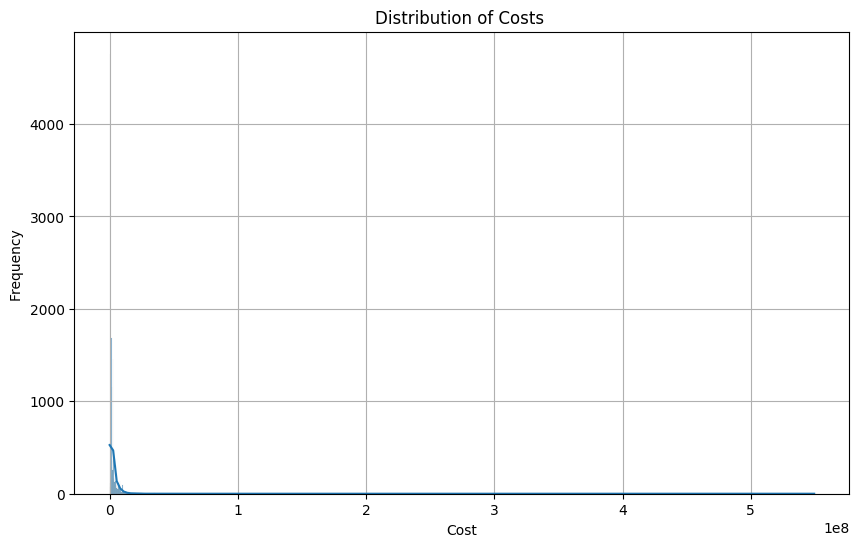

In [78]:
# Again very big outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['ecMaxContribution'], kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

(15284, 206)


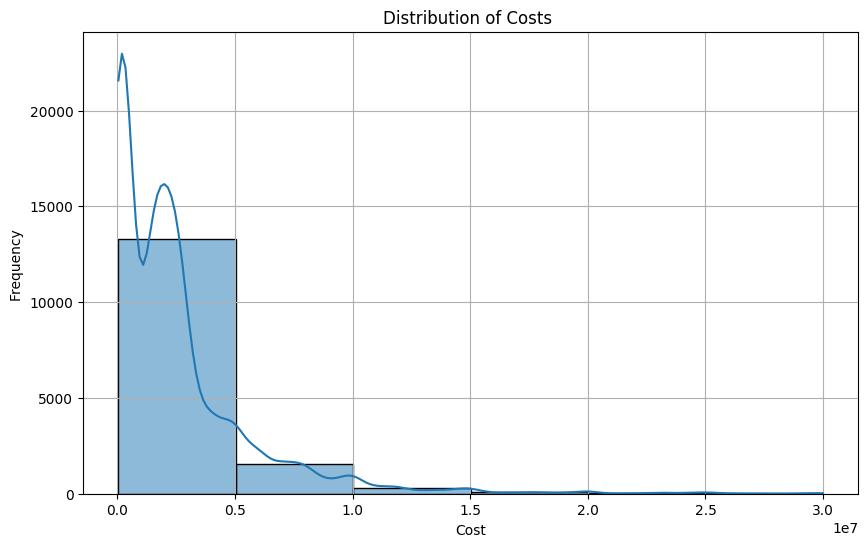

In [79]:
# Only keep projects funding < 30 000 000 for now
# only 54 projects with funding > 30 000 000
# Biggest Majority of the projects have funding < 5000000
fulldf = fulldf[fulldf["ecMaxContribution"] < 30000000]
print(fulldf.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['ecMaxContribution'], binwidth=5000000, kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

(13272, 206)


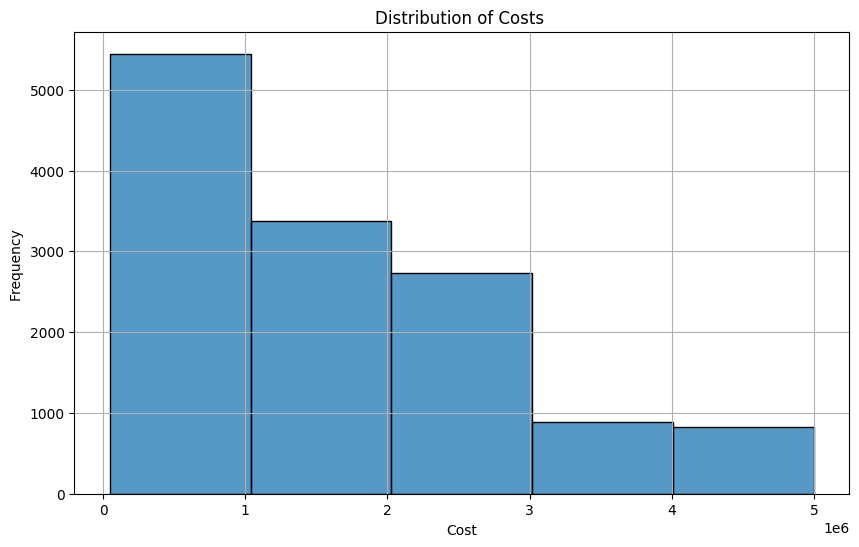

In [80]:
# Only keep projects funding < 5000000 for now
# Seems to be better for the ML training
fulldf = fulldf[fulldf["ecMaxContribution"] < 5000000]
print(fulldf.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['ecMaxContribution'], binwidth=1000000)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

## Folowing cells  only for the projects with funding < 5000000

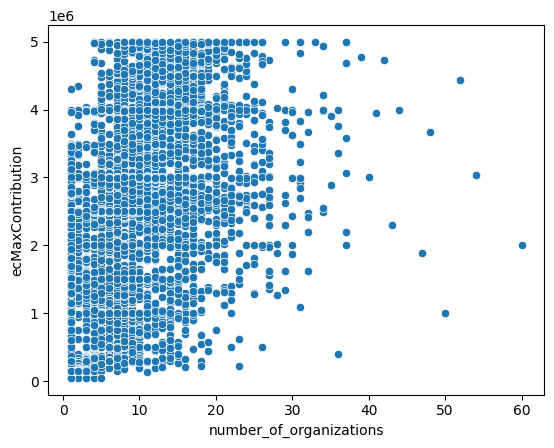

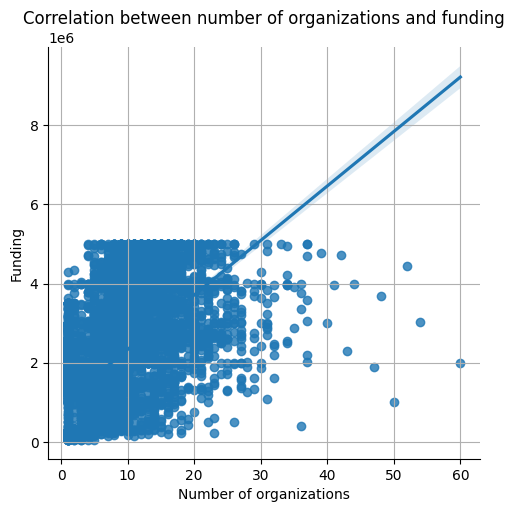

                         ecMaxContribution  number_of_organizations
ecMaxContribution                     1.00                     0.59
number_of_organizations               0.59                     1.00


In [ ]:

# Check corr, ecMaxContribution and number_of_organizations
sns.scatterplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number of organizations and funding")
plt.xlabel("Number of organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["ecMaxContribution", "number_of_organizations"]].corr())

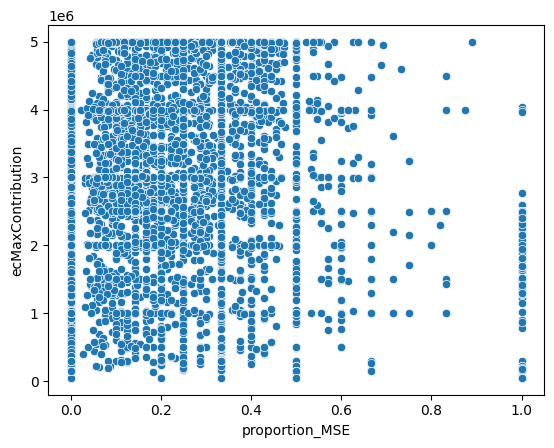

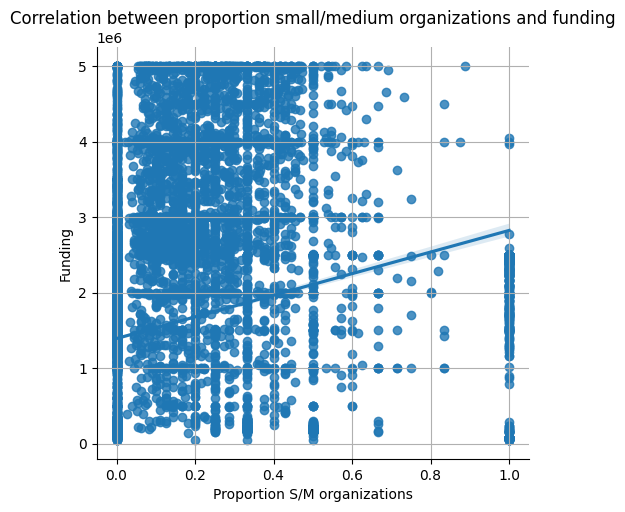

                         proportion_MSE  number_of_organizations
proportion_MSE                     1.00                     0.13
number_of_organizations            0.13                     1.00


In [84]:
# Check corr, ecMaxContribution and proportion_MSE, smaller cor (0.13, expected negative sign)
sns.scatterplot(x="proportion_MSE", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="proportion_MSE", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between proportion small/medium organizations and funding")
plt.xlabel("Proportion S/M organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["proportion_MSE", "number_of_organizations"]].corr())

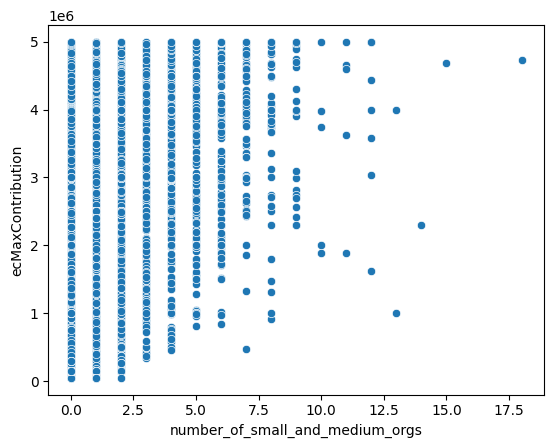

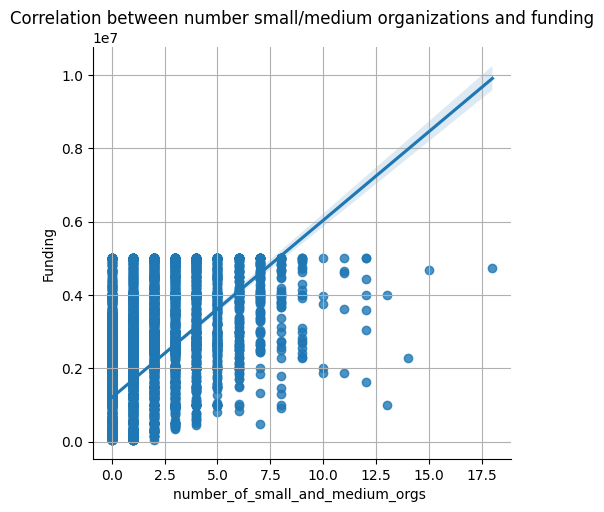

                                 number_of_small_and_medium_orgs  \
number_of_small_and_medium_orgs                             1.00   
ecMaxContribution                                           0.55   

                                 ecMaxContribution  
number_of_small_and_medium_orgs               0.55  
ecMaxContribution                             1.00  


In [85]:
# Check corr, ecMaxContribution and number of MSE, less corr than number of organizations (as expected). 
# Since proportion SME seems not to be very informative, we can drop it
sns.scatterplot(x="number_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number small/medium organizations and funding")
plt.xlabel("number_of_small_and_medium_orgs ")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["number_of_small_and_medium_orgs", "ecMaxContribution"]].corr())

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\352689526.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None)


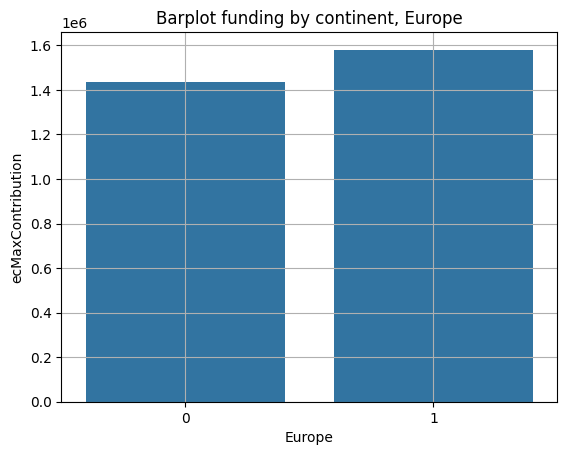

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\352689526.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None, estimator="median")


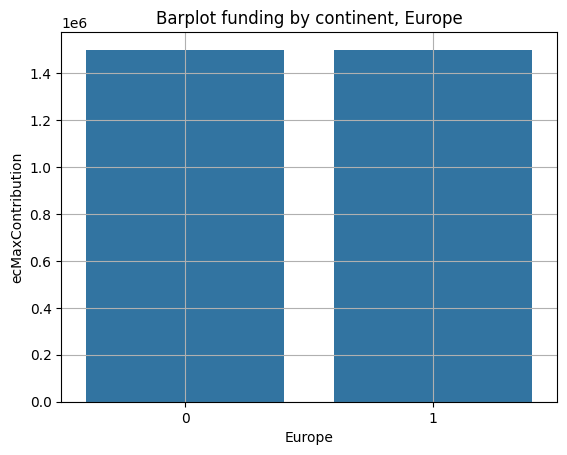

In [86]:
# Mean differnce of 190 000
# No median difference, outliers to the right in Europe case
sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\256045126.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None)


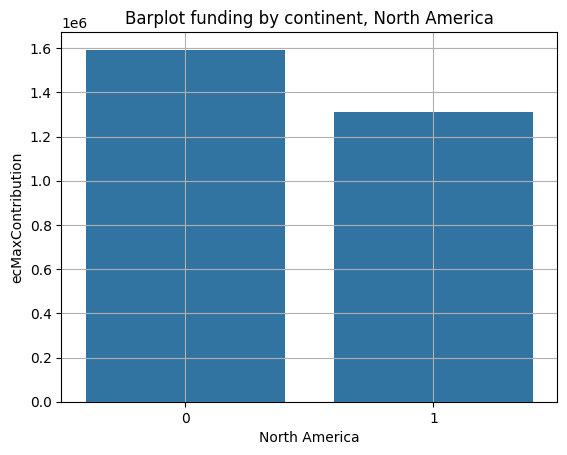

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\256045126.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None, estimator="median")


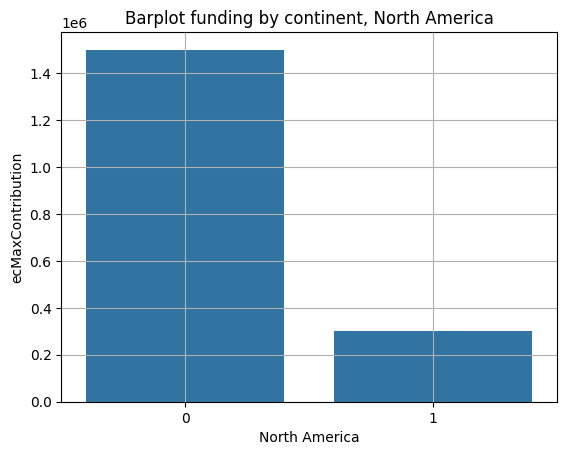

In [87]:
# Lower median for North America
# Big difference mean/median, North Americea has a lot of outliers
sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\2169848761.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None)


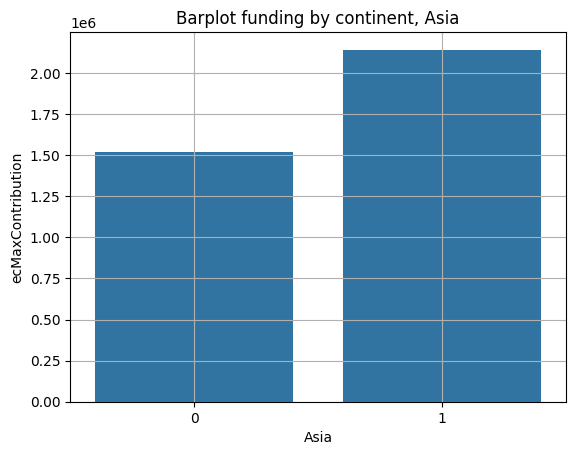

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\2169848761.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None, estimator="median")


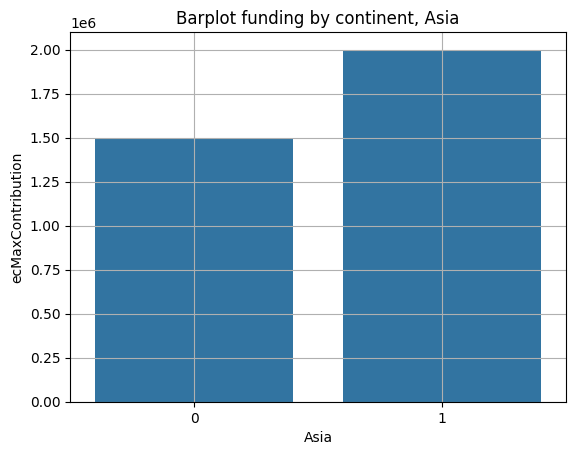

In [88]:
# Mean bit higher than median for Asian involvment, higher funding when Asia is involved (higher than Europe and North America)
sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\781215448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None)


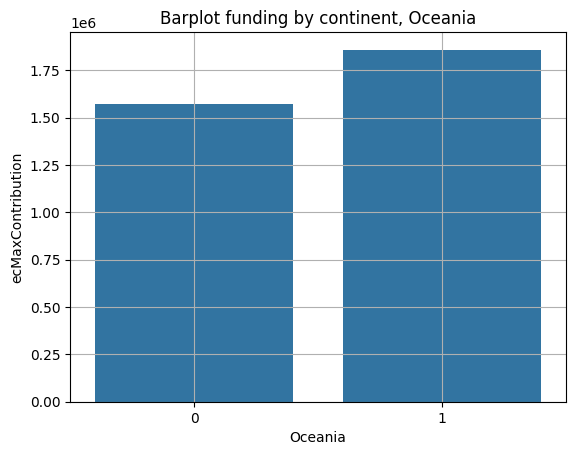

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\781215448.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None, estimator="median")


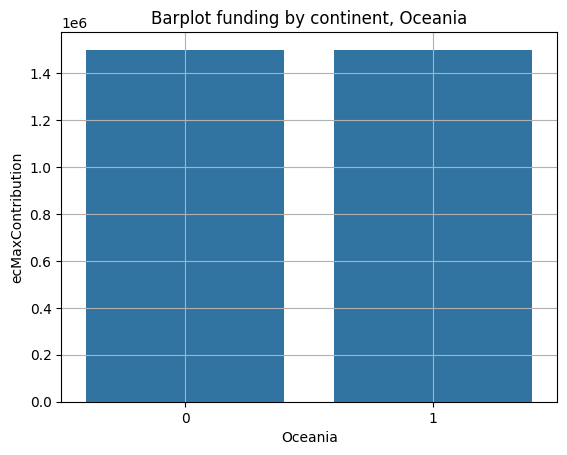

In [89]:
# No difference in median, mean is a bit higher for Oceanian involvment
# Outliers for Oceanian involvment group
sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\12477514.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None)


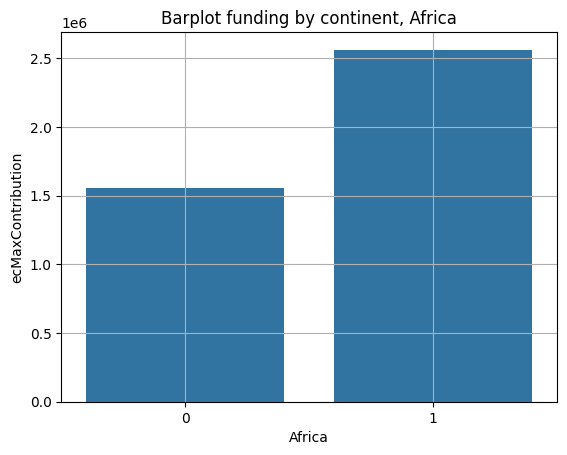

C:\Users\kian3\AppData\Local\Temp\ipykernel_28640\12477514.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None, estimator="median")


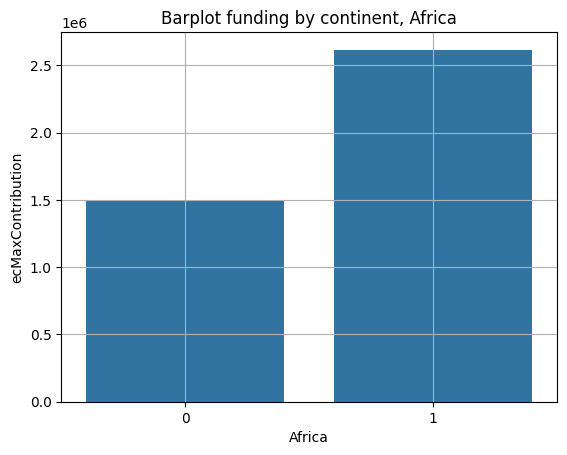

In [90]:
# Highest median for Africa
# Mean/median difference is small
sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

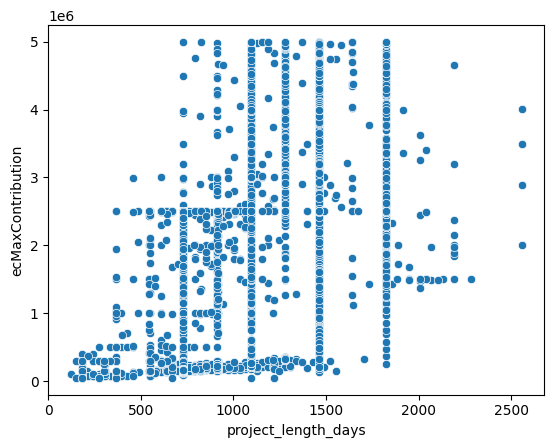

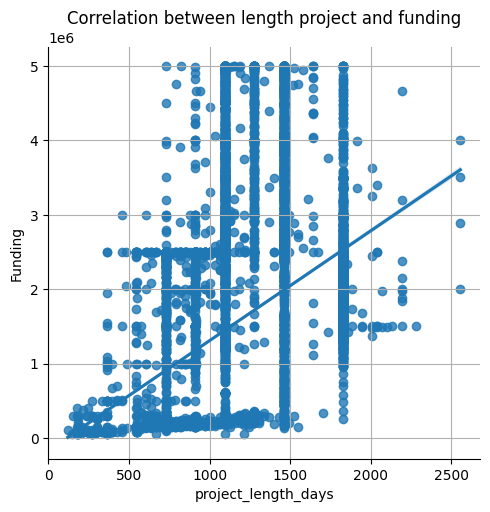

                     project_length_days  ecMaxContribution
project_length_days                 1.00               0.52
ecMaxContribution                   0.52               1.00


In [91]:
# Seems to be a correlation between project length and funding
sns.scatterplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between length project and funding")
plt.xlabel("project_length_days")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["project_length_days", "ecMaxContribution"]].corr())

In [ ]:
# prepare for ML (provisional, only < 5000000), nan will dissapear once the country=NaN for NA has been fixed
# drop_cols = ['problem_type', 'expected_impact',\
            # 'semantic_summary']
drop_cols = ['id','status', 'startDate', 'endDate', 'legalBasis','fundingScheme','objective_y','main_topics', 'scientific_domain', 'number_of_small_and_medium_orgs','proportion_MSE', \
            'all_continents', 'problem_type', 'expected_impact', 'semantic_summary']


fulldf = fulldf.drop(columns=drop_cols)
print(fulldf.columns)

Index([                                           'ecMaxContribution',
                                                     'sustainability',
                                                'project_length_days',
                                               'fundamental research',
                                                   'applied research',
                                             'translational research',
                                                       'confidential',
                                                    'societal_impact',
                                                    'economic_impact',
                                               'technological_impact',
       ...
                                                'confidential_domain',
       'urban planning and sustainability - interdisciplinary_domain',
                                            'number_of_organizations',
                                                               'As

In [98]:
fulldf["sustainability"] = fulldf["sustainability"].astype(int)

# Model Building

In [104]:
print(fulldf["ecMaxContribution"].describe())

count     13272.00
mean    1576216.86
std     1372561.81
min       46594.00
25%      195914.88
50%     1499574.50
75%     2499266.25
max     4999999.55
Name: ecMaxContribution, dtype: float64


In [109]:
1372561.81/488733.5206039573

2.808405300917038

In [ ]:
# std= 1372561.81, RMSE on test set = 488733.5206039573 (dropped with 2.81)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

X = fulldf.drop(columns=["ecMaxContribution"])
y = fulldf["ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds = bayes_best.predict(X_test)
bayes_mae = mean_absolute_error(y_test, bayes_preds)
bayes_mse = mean_squared_error(y_test, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -229267162331.32086
Bayes Search Best CV score (RMSE): 478818.50667170424
Bayes Search Test MAE: 301136.3009384418
Bayes Search Test MSE: 238860454161.93875
Bayes Search Test RMSE: 488733.5206039573


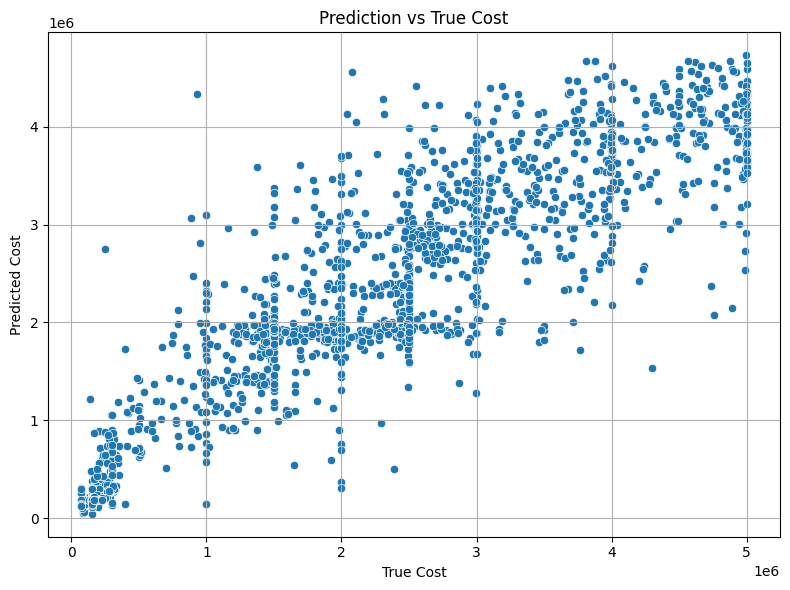

Correlation between True Cost and Predicted Cost: 0.93


In [110]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=bayes_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, bayes_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

In [ ]:
# Funding programme seems important (maybe we can group them, see beneath Hin HORIZON for example, to use less cat's)
fi = pd.DataFrame({
  "feature": X_train.columns,
  "importance": bayes_best.feature_importances_
}).sort_values("importance", ascending=False)
print(fi)

                                               feature  importance
49                              HORIZON-TMA-MSCA-PF-GF        0.12
65                                  HORIZON-EIC-ACC-BF        0.08
45                              HORIZON-TMA-MSCA-PF-EF        0.08
50                                 HORIZON-TMA-MSCA-SE        0.08
1                                  project_length_days        0.05
..                                                 ...         ...
181  urban planning and sustainability - interdisci...        0.00
176                                  literature_domain        0.00
180                                confidential_domain        0.00
178                                 art history_domain        0.00
177                            material science_domain        0.00

[190 rows x 2 columns]
